In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn
!pip install xgboost

In [2]:
!pip install tensorflow


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import BaggingClassifier



**Load Data**

In [4]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Data Exploration**
* data.describe() provides a statistical summary of all numerical features including mean, median, standard deviation, etc., which can help in understanding the distribution of data.
* data.isnull().sum() will list the number of missing values in each column, which is crucial for clean and reliable data modeling.
* data['Outcome'].value_counts() will show how many instances are classified as 0 (no diabetes) and 1 (diabetes), which is useful to check for imbalance in the dataset.

In [5]:
print(data.describe())
print(data.isnull().sum())
print(data['Outcome'].value_counts())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**Data Cleaning**

In [6]:
# Columns that need zero value treatment
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN and then fill with median of each column
for col in columns:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].median())

print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

**Exploratory Data Analysis (EDA)**

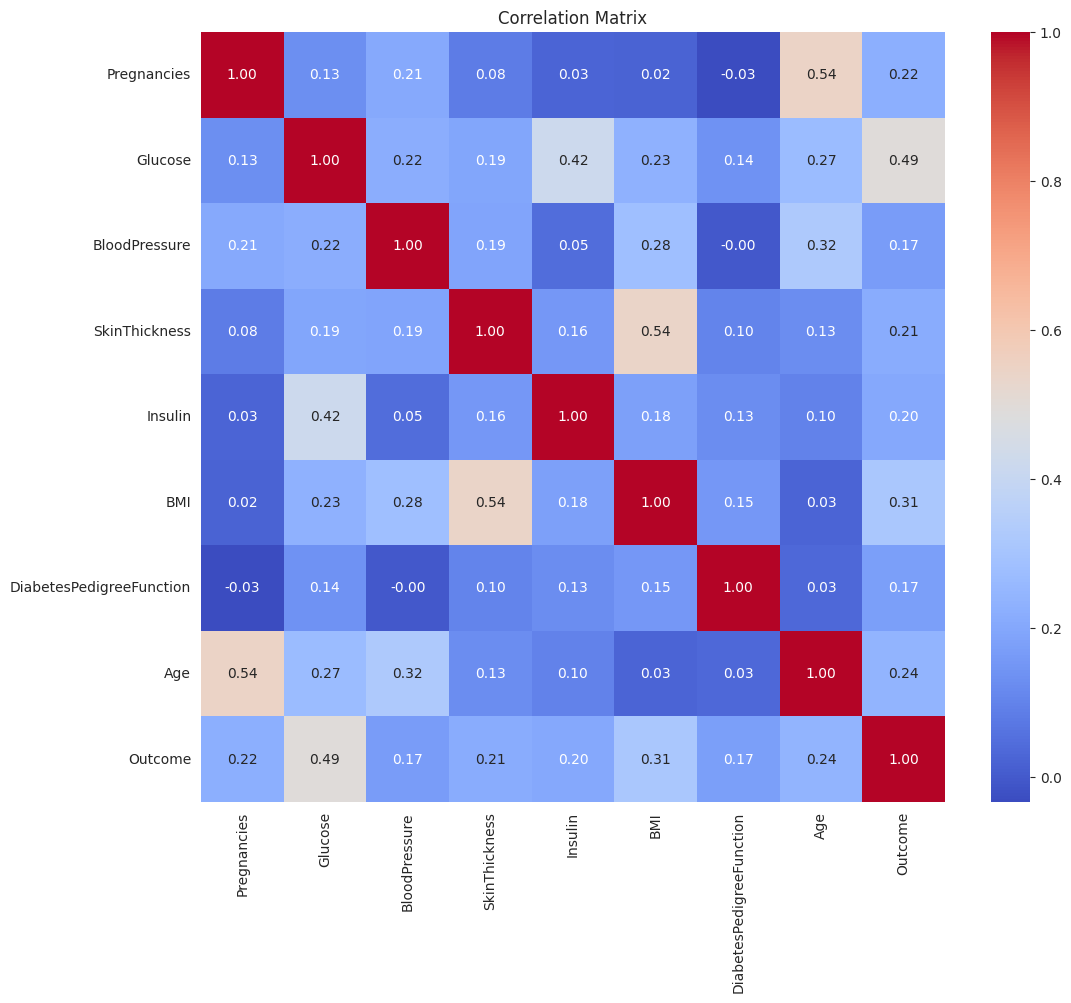

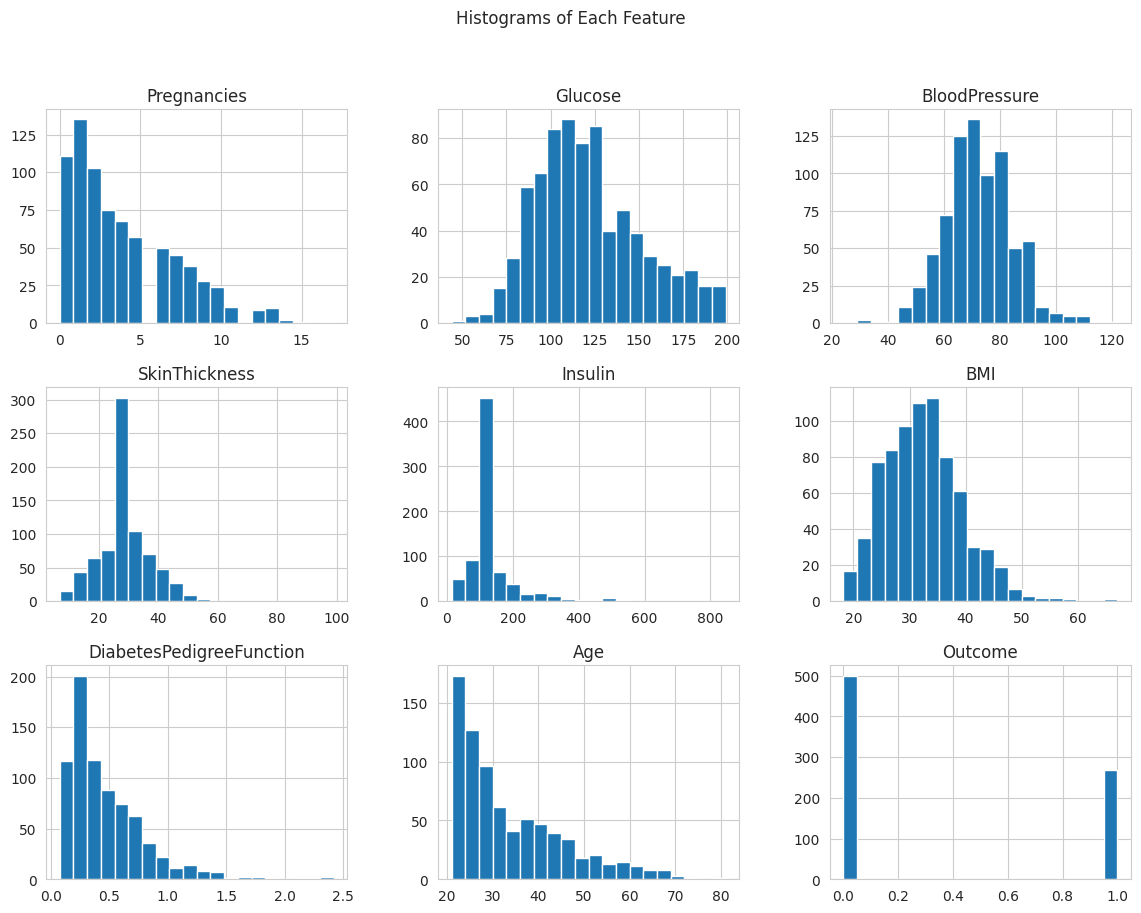

<Figure size 1400x800 with 0 Axes>

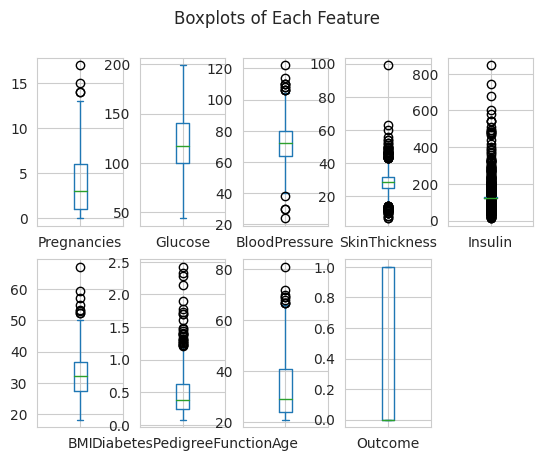

In [61]:
sns.set_style("whitegrid")

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')  
plt.show()

# Histograms for each feature
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Each Feature')
plt.savefig('histograms.png')
plt.show()

# Boxplots for each feature
plt.figure(figsize=(14, 8))
data.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.suptitle('Boxplots of Each Feature')
plt.savefig('boxplots.png') 
plt.show()


**Model Definition**

In [44]:
# Split the data into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear') 

# Fit the model
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [46]:
# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Confusion Matrix:
[[87 12]
 [22 33]]
Accuracy: 0.7792207792207793


**Bagging with Logistic Regression**

In [54]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=50, random_state=42)

# Fit the Bagging model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
print("Classification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging))
print("Confusion Matrix (Bagging):")
print(confusion_matrix(y_test, y_pred_bagging))
print("Accuracy (Bagging):", accuracy_score(y_test, y_pred_bagging))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report (Bagging):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix (Bagging):
[[88 11]
 [22 33]]
Accuracy (Bagging): 0.7857142857142857


**RFE + Bagging**

In [55]:
# Initialize RFE with Logistic Regression
rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Initialize Bagging with Logistic Regression
bagging_model_rfe = BaggingClassifier(base_estimator=log_reg, n_estimators=50, random_state=42)

# Fit the Bagging model on the reduced feature set
bagging_model_rfe.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rfe_bagging = bagging_model_rfe.predict(X_test_rfe)

# Evaluate the model
print("Classification Report (RFE + Bagging):")
print(classification_report(y_test, y_pred_rfe_bagging))
print("Confusion Matrix (RFE + Bagging):")
print(confusion_matrix(y_test, y_pred_rfe_bagging))
print("Accuracy (RFE + Bagging):", accuracy_score(y_test, y_pred_rfe_bagging))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report (RFE + Bagging):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix (RFE + Bagging):
[[88 11]
 [22 33]]
Accuracy (RFE + Bagging): 0.7857142857142857


**Tune the Decision Threshold**

In [56]:
# Get prediction probabilities
y_prob_rfe_bagging = bagging_model_rfe.predict_proba(X_test_rfe)[:, 1]

# Explore different thresholds
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# Evaluate the model for each threshold
for thresh in thresholds:
    y_pred_thresh = (y_prob_rfe_bagging >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_thresh))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))
    print("Accuracy:", accuracy_score(y_test, y_pred_thresh))



Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154

Confusion Matrix:
[[77 22]
 [15 40]]
Accuracy: 0.7597402597402597

Threshold: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
[[83 16]
 [19 36]]
Accuracy: 0.7727272727272727

Threshold: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.

**Hyperparameter Tuning for Logistic Regression in Bagging**

In [57]:
# Define parameter grid for Logistic Regression
param_grid = {'base_estimator__C': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to tune parameters inside Bagging
grid_search = GridSearchCV(BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear')),
                           param_grid, cv=5, n_jobs=-1)

# Fit the model with hyperparameter search
grid_search.fit(X_train_rfe, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on the test set with the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test_rfe)

# Evaluate the tuned model
print("Classification Report (Tuned Logistic Regression + Bagging):")
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix (Tuned Logistic Regression + Bagging):")
print(confusion_matrix(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

Best Parameters: {'base_estimator__C': 10}
Classification Report (Tuned Logistic Regression + Bagging):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix (Tuned Logistic Regression + Bagging):
[[86 13]
 [22 33]]
Accuracy: 0.7727272727272727


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Train the Final Model with Bagging and RFE**

In [58]:
# Re-train the final model using RFE + Bagging
bagging_model_final = BaggingClassifier(
    base_estimator=LogisticRegression(solver='liblinear'), 
    n_estimators=50, random_state=42
)

# Fit the model on reduced features (RFE)
bagging_model_final.fit(X_train_rfe, y_train)

# Predict probabilities on the test set
y_prob_final = bagging_model_final.predict_proba(X_test_rfe)[:, 1]

# Apply the chosen threshold (0.6)
y_pred_final = (y_prob_final >= 0.6).astype(int)

# Evaluate the final model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Final Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("Accuracy:", accuracy_score(y_test, y_pred_final))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Final Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        99
           1       0.90      0.49      0.64        55

    accuracy                           0.80       154
   macro avg       0.84      0.73      0.75       154
weighted avg       0.82      0.80      0.78       154

Confusion Matrix:
[[96  3]
 [28 27]]
Accuracy: 0.7987012987012987


In [59]:
import joblib

# Save the final model
joblib.dump(bagging_model_final, 'final_bagging_model.pkl')

# To load the model later:
# loaded_model = joblib.load('final_bagging_model.pkl')


['final_bagging_model.pkl']